<a href="https://colab.research.google.com/github/HennyMelinaPutri/uas-data-mining/blob/main/UasDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/uas data/Stroke Dataset.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#import library penting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
#cek jumlah data dan kolomnya
data.shape

(5110, 12)

## Feature Engineering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data['bmi'].isna()
data[data.bmi.isna()].sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
78,45805,Female,51.00,0,0,Yes,Private,Urban,165.31,NaN,never smoked,1
1730,27135,Male,69.00,1,0,Yes,Private,Rural,107.11,NaN,smokes,0
4616,5774,Male,59.00,0,0,Yes,Private,Urban,223.16,NaN,Unknown,0
3375,11259,Female,53.00,0,0,Yes,Private,Urban,227.68,NaN,never smoked,0
1106,53817,Female,71.00,1,0,Yes,Self-employed,Rural,66.12,NaN,never smoked,0
2215,19439,Male,67.00,0,1,Yes,Private,Rural,97.24,NaN,Unknown,0
1756,15515,Female,48.00,0,0,Yes,Self-employed,Rural,209.90,NaN,smokes,0
1644,4538,Female,29.00,0,0,No,Private,Urban,81.43,NaN,formerly smoked,0
167,43364,Male,79.00,1,0,Yes,Private,Rural,75.02,NaN,never smoked,1
2030,38920,Male,0.48,0,0,No,children,Urban,73.02,NaN,Unknown,0


In [ ]:
#mengisi nilai NaN BMI dengan mean
avg_bmi = data['bmi'].mean();
data['bmi'].fillna(avg_bmi, inplace=True)

#mencari nilai Unknown pada smoking_status
data[data['smoking_status'] == 'Unknown']

#mengisi nilai unknown pada smoking_status
status = ["never smoked", "smokes", "formerly smoked"]
count_smoking_status = data[data['smoking_status'] == 'Unknown'].shape[0]
random_smoking_status = np.random.choice(status, size=count_smoking_status)
data.loc[data['smoking_status'] == 'Unknown', 'smoking_status'] = random_smoking_status

#ganti smoking_status menjadi integer
data.replace({'smoking_status': {"never smoked" : 0, "smokes" : 1, "formerly smoked" : 2}}, inplace=True)


#drop kolom yang tidak digunakan
data = data.drop(['id', 'gender', 'ever_married', 'work_type', 'Residence_type'], axis=1)

In [ ]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.600000,2,1
1,61.0,0,0,202.21,28.893237,0,1
2,80.0,0,1,105.92,32.500000,0,1
3,49.0,0,0,171.23,34.400000,1,1
4,79.0,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0
5106,81.0,0,0,125.20,40.000000,0,0
5107,35.0,0,0,82.99,30.600000,0,0
5108,51.0,0,0,166.29,25.600000,2,0


# **Step EDA**

In [ ]:
#cek data kosong
data.isnull().values.any()

False

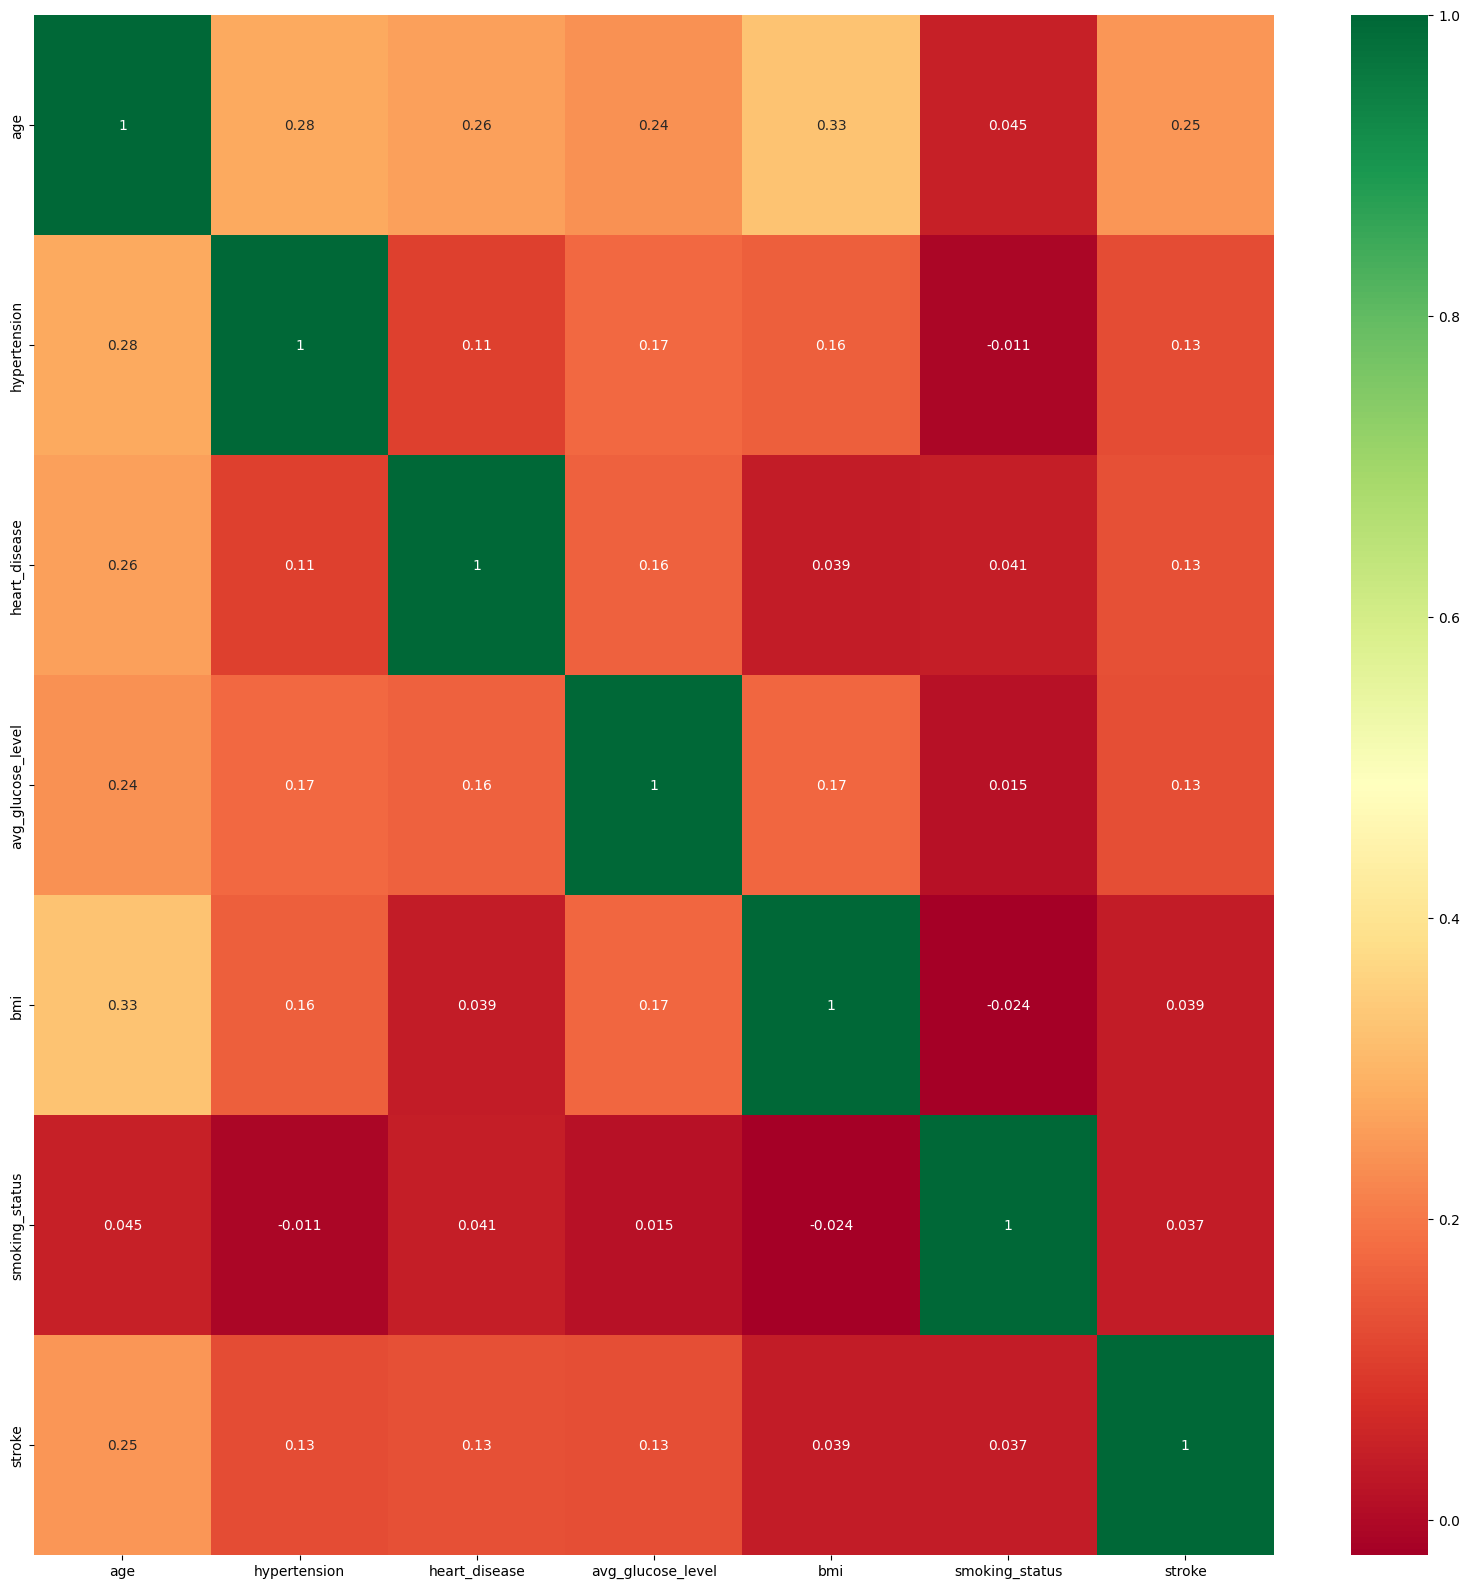

In [ ]:
#Korelasi menggunakan heatmap
import seaborn as sns

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Show corellation in tables
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.044680,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,-0.010667,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.040794,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.014860,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,-0.023553,0.038947
smoking_status,0.044680,-0.010667,0.040794,0.014860,-0.023553,1.000000,0.037051
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,0.037051,1.000000


In [ ]:
#statistika dasar
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.802348,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.839471,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,1.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,2.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,2.000000,1.000000


In [ ]:
#cek data kosong
data.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#checking skewness dari data
Stroke_true_count =len(data.loc[data['stroke']==1])
Stroke_false_count = len(data.loc[data['stroke']==0])

<Axes: xlabel='stroke', ylabel='Count'>

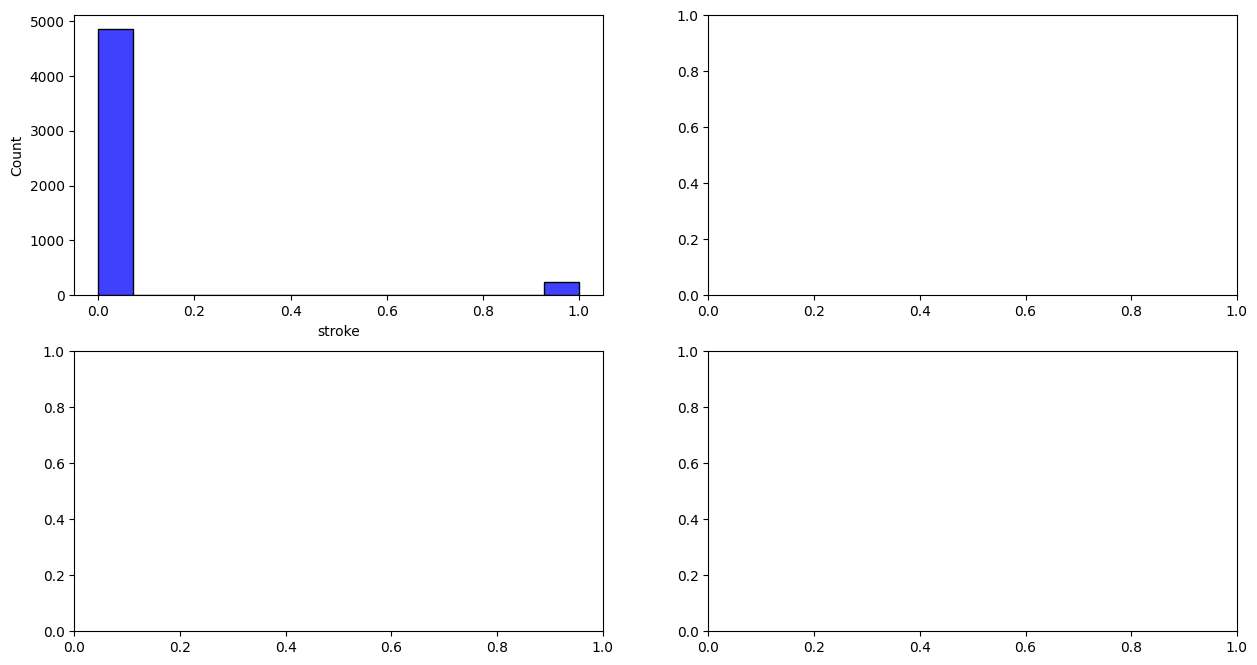

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(15,8))
sns.histplot(data=data,x='stroke',ax=axes[0,0],color='blue')

In [ ]:
#menunjukan korelasi didalam table
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.044680,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,-0.010667,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.040794,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.014860,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,-0.023553,0.038947
smoking_status,0.044680,-0.010667,0.040794,0.014860,-0.023553,1.000000,0.037051
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,0.037051,1.000000


In [ ]:
pip install imbalanced-learn

In [ ]:
#Melakukan oversampling
from imblearn.over_sampling import SMOTE

new_data = data.copy()
x_target = new_data.drop('stroke', axis=1)
y_target = new_data['stroke']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

x_resampled, y_resampled = smote.fit_resample(x_target, y_target)

oversampled_data = pd.concat([x_resampled, y_resampled], axis=1)

oversampled_data['stroke'].value_counts()

oversampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9722 non-null   float64
 1   hypertension       9722 non-null   int64  
 2   heart_disease      9722 non-null   int64  
 3   avg_glucose_level  9722 non-null   float64
 4   bmi                9722 non-null   float64
 5   smoking_status     9722 non-null   int64  
 6   stroke             9722 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 531.8 KB


In [ ]:
#checking skewness dari data
true_stroke_oversampled_data =len(oversampled_data.loc[oversampled_data['stroke']==1])
false_stroke_oversampled_data = len(oversampled_data.loc[oversampled_data['stroke']==0])

(true_stroke_oversampled_data, false_stroke_oversampled_data)

(4861, 4861)

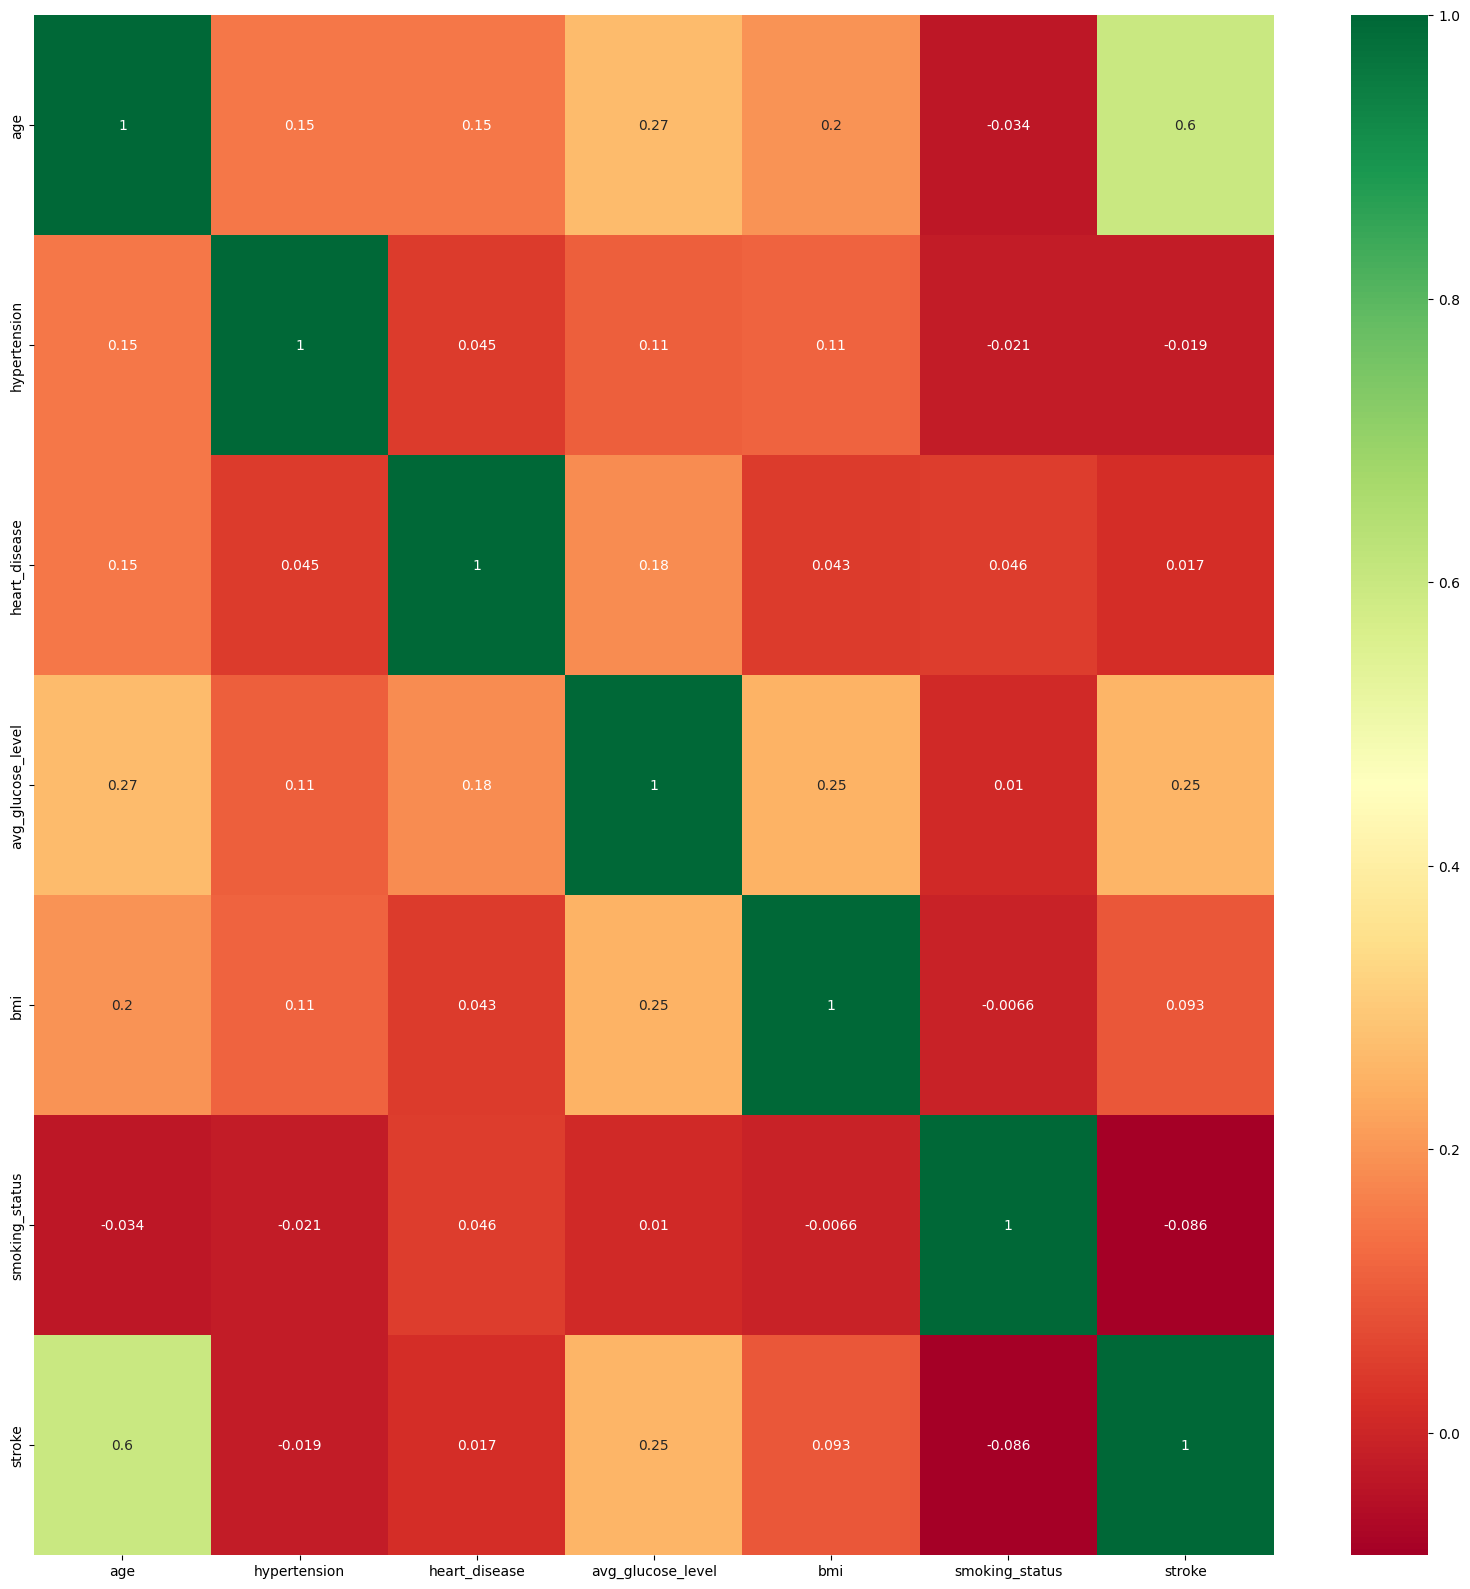

In [ ]:
korelasi = oversampled_data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(oversampled_data[features].corr(),annot=True,cmap="RdYlGn")

## membuat model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x = oversampled_data.drop('stroke', axis=1)
y = oversampled_data['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#training data
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_predict = xgb_model.predict(x_test)
print(confusion_matrix(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict))

[[891  84]
 [ 54 916]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       975
           1       0.92      0.94      0.93       970

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



In [ ]:
xgb_predict

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
data = {
    "age" : 80,
    "hypertension": 0,
    "heart_disease": 1,
    "avg_glucose_level": 240,
    "bmi" : 36.5,
    "smoking_status": 0
}

user_data = pd.DataFrame(data, index=[0])
xgb_predict = xgb_model.predict(user_data)
xgb_predict


array([1])